In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

sns.set_style("darkgrid")

In [2]:
df=pd.read_csv("C:\\Users\\JYOTIR\\OneDrive\\Desktop\\dataset\\StudentsPerformance.csv")

In [3]:
df.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [4]:
df.shape

(1000, 8)

In [5]:
df.describe().T.style.bar(subset=['mean'], color='	#FF34B3')\
                               .background_gradient(subset=['std'],cmap='viridis')\
                               .background_gradient(subset=['50%'],cmap='mako')


,count,mean,std,min,25%,50%,75%,max
math score,1000.000000,66.089000,15.163080,0.000000,57.000000,66.000000,77.000000,100.000000
reading score,1000.000000,69.169000,14.600192,17.000000,59.000000,70.000000,79.000000,100.000000
writing score,1000.000000,68.054000,15.195657,10.000000,57.750000,69.000000,79.000000,100.000000


In [6]:
##The lowest average score was math which was also the only subject that had 0 as a minimum

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   gender                       1000 non-null   object
 1   race/ethnicity               1000 non-null   object
 2   parental level of education  1000 non-null   object
 3   lunch                        1000 non-null   object
 4   test preparation course      1000 non-null   object
 5   math score                   1000 non-null   int64 
 6   reading score                1000 non-null   int64 
 7   writing score                1000 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 62.6+ KB


In [8]:
df.dtypes

gender                         object
race/ethnicity                 object
parental level of education    object
lunch                          object
test preparation course        object
math score                      int64
reading score                   int64
writing score                   int64
dtype: object

In [9]:
df

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75
...,...,...,...,...,...,...,...,...
995,female,group E,master's degree,standard,completed,88,99,95
996,male,group C,high school,free/reduced,none,62,55,55
997,female,group C,high school,free/reduced,completed,59,71,65
998,female,group D,some college,standard,completed,68,78,77


In [10]:
df.isnull().sum()

gender                         0
race/ethnicity                 0
parental level of education    0
lunch                          0
test preparation course        0
math score                     0
reading score                  0
writing score                  0
dtype: int64

In [11]:
df.rename(columns={"race/ethnicity":"race"}, inplace=True)

In [12]:
df.head()

,gender,race,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [13]:
%matplotlib inline

##Data Visualization

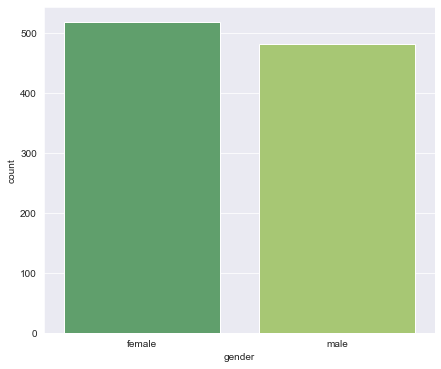

In [14]:
plt.figure(figsize=(7,6))
sns.countplot(x=df['gender'], palette='summer')

In [15]:
df['gender'].value_counts()

female    518
male      482
Name: gender, dtype: int64

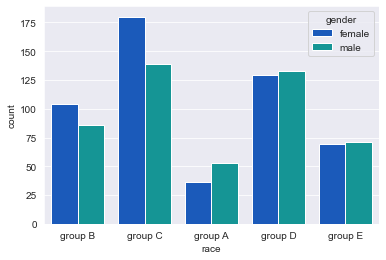

In [16]:
sns.countplot(x=df['race'], palette='winter', hue=df['gender'])

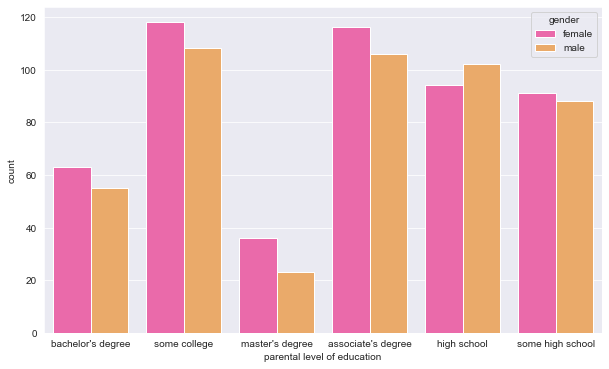

In [17]:
plt.figure(figsize=(10,6))
sns.countplot(x=df["parental level of education"], palette='spring', hue=df['gender'])

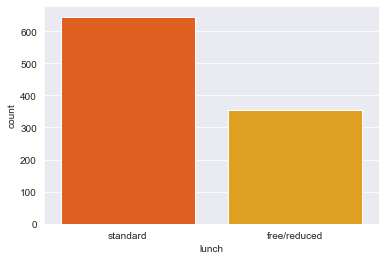

In [18]:
sns.countplot(x=df['lunch'], palette='autumn')

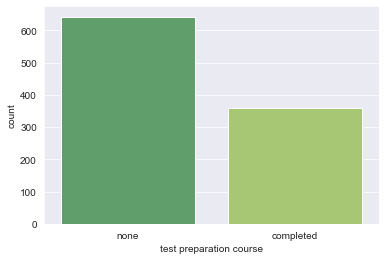

In [19]:
sns.countplot(x=df['test preparation course'], palette='summer')

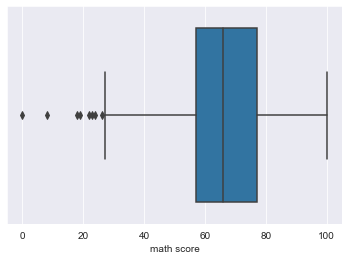

In [24]:
sns.boxplot(x=df['math score'])

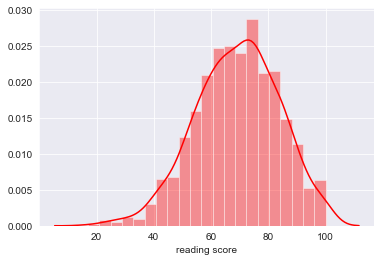

In [34]:
sns.distplot(df['reading score'], color='r')

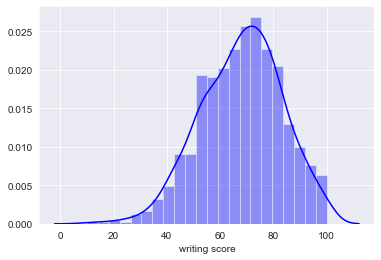

In [35]:
sns.distplot(df['writing score'], color='b')

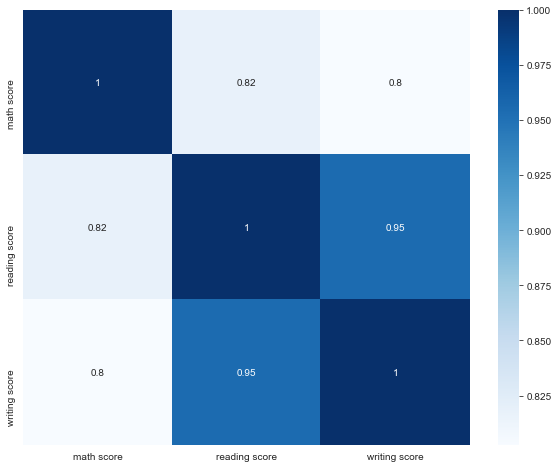

In [39]:
plt.figure(figsize=(10, 8))
sns.heatmap(df.corr(), annot=True, cmap="Blues")

In [36]:
df.head()

,gender,race,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [37]:
x=df.drop(columns=['writing score'])
x.head()

,gender,race,parental level of education,lunch,test preparation course,math score,reading score
0,female,group B,bachelor's degree,standard,none,72,72
1,female,group C,some college,standard,completed,69,90
2,female,group B,master's degree,standard,none,90,95
3,male,group A,associate's degree,free/reduced,none,47,57
4,male,group C,some college,standard,none,76,78


In [38]:
y=df.iloc[:,7]
y

0      74
1      88
2      93
3      44
4      75
       ..
995    95
996    55
997    65
998    77
999    86
Name: writing score, Length: 1000, dtype: int64

##pipeline

In [41]:
from sklearn.model_selection import train_test_split

x_train,x_test,y_train,y_test= train_test_split(x,y,test_size=0.25)

In [42]:
nom_cols= [0,1,3,4]
ord_cols= [2]
num_cols= [5,6]

In [49]:
from sklearn.preprocessing import OneHotEncoder, OrdinalEncoder, StandardScaler

from sklearn.compose import make_column_transformer

from sklearn import set_config

In [50]:
trans = make_column_transformer((OneHotEncoder(sparse=False),nom_cols),
                               (OrdinalEncoder(),ord_cols),
                               (StandardScaler(),num_cols),
                               remainder= 'passthrough')
set_config(display='diagram')

In [51]:
trans

ColumnTransformer(remainder='passthrough',
                  transformers=[('onehotencoder', OneHotEncoder(sparse=False),
                                 [0, 1, 3, 4]),
                                ('ordinalencoder', OrdinalEncoder(), [2]),
                                ('standardscaler', StandardScaler(), [5, 6])])

In [54]:
from sklearn.linear_model import LinearRegression

mode = LinearRegression()

mode

LinearRegression()

In [53]:
from sklearn.pipeline import make_pipeline

pipe = make_pipeline(trans,mode)

pipe

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('onehotencoder',
                                                  OneHotEncoder(sparse=False),
                                                  [0, 1, 3, 4]),
                                                 ('ordinalencoder',
                                                  OrdinalEncoder(), [2]),
                                                 ('standardscaler',
                                                  StandardScaler(), [5, 6])])),
                ('linearregression', LinearRegression())])

In [55]:
pipe.fit(x_train,y_train)

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('onehotencoder',
                                                  OneHotEncoder(sparse=False),
                                                  [0, 1, 3, 4]),
                                                 ('ordinalencoder',
                                                  OrdinalEncoder(), [2]),
                                                 ('standardscaler',
                                                  StandardScaler(), [5, 6])])),
                ('linearregression', LinearRegression())])

In [57]:
pred = pipe.predict(x_test)
pred

array([ 96.57350383,  73.44385971,  80.54812212,  73.80682692,
        74.31374524,  42.96454428,  77.78375418,  97.8543476 ,
        79.5310901 ,  65.10856116,  69.28791289,  74.81103188,
        45.00078486,  78.00821993,  84.14236346,  80.42616216,
        59.77321606,  77.27663864,  61.68573576,  66.61921826,
        83.74186303,  65.74914653,  54.10320433,  45.04137448,
        72.5964684 ,  80.67380308,  91.50321288,  64.47404389,
        69.82397187,  54.84035154,  65.58953529, 100.8935217 ,
        63.29610206,  56.59789543,  73.16308744,  60.11437675,
        74.95132285,  83.66572532,  55.34436507,  62.6070367 ,
        48.22491242,  74.10226894,  68.30852639,  68.49257217,
        61.13092847,  59.52644631,  49.04511983,  73.38209872,
        70.19631795,  67.90770341,  79.25789568,  56.5355154 ,
        75.93980215,  63.30868257,  86.21572252,  70.15352481,
        60.14016865,  68.08385569,  71.64999745,  55.78705742,
        97.15951537,  61.32233452,  65.66345728,  75.48

In [62]:
from sklearn.metrics import mean_squared_error
mean_squared_error(pred,y_test)


12.714593310076738